# Lab 2
### Context

#### Classification
+ Logistic Regression
+ Support Vector Machine
+ Decision Tree
+ Random Forest
+ XGBoost
+ LightGBM

#### Evaluation
+ Accuracy
+ Confusion Matrix
+ ROC-AUC

In [1]:
import os
from os.path import join

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
BASE_DIR = ''

train_path = join(BASE_DIR, 'data', 'MDC14', 'train.csv')
test_path  = join(BASE_DIR, 'data', 'MDC14', 'test.csv')

data = pd.read_csv(train_path)
x_test = pd.read_csv(test_path)

label = data['credit']

In [4]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
data.shape

(26457, 20)

In [6]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [8]:
x_test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [9]:
x_test.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


In [10]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [12]:
# 불필요한 컬럼 제거
data.drop(columns=['index', 'credit'], inplace=True)
x_test.drop(columns=['index'],         inplace=True)

In [13]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O'] 
num_columns = [c for c    in data.columns if c not in cat_columns]

print('Categorical Columns: \n{}\n'.format(cat_columns))
print('Numeric Columns: \n{}'.format(num_columns))

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']


<AxesSubplot:>

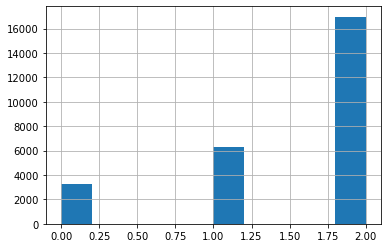

In [14]:
label.hist()

In [ ]:
# Sampling, Over Sampling Under Sampling, SMOTE "imblearn"

### 실습 1 (15분)
- 이번 주차부터는 Train 데이터셋을 Train, Valid로 쪼개서 모델 검증에 사용할 데이터를 추가할 예정입니다.
    - 이전에도 말씀드렸듯 쪼갠 Train 데이터에 Valid 또는 Test 데이터의 정보가 들어가지 않도록 주의해주세요.
    - 데이터를 쪼갤때는 Scikit-learn의 model_selection 패키지에 있는 train_test_split() 함수를 사용합니다.

1. 결측치 확인 및 결측치 처리
2. 스케일링
3. 범주형 변수 OneHot Encoding, 라벨 변수 Label Encoding

#### 1. 결측치 확인 및 결측치 처리 예시

In [15]:
import missingno as msno

<AxesSubplot:>

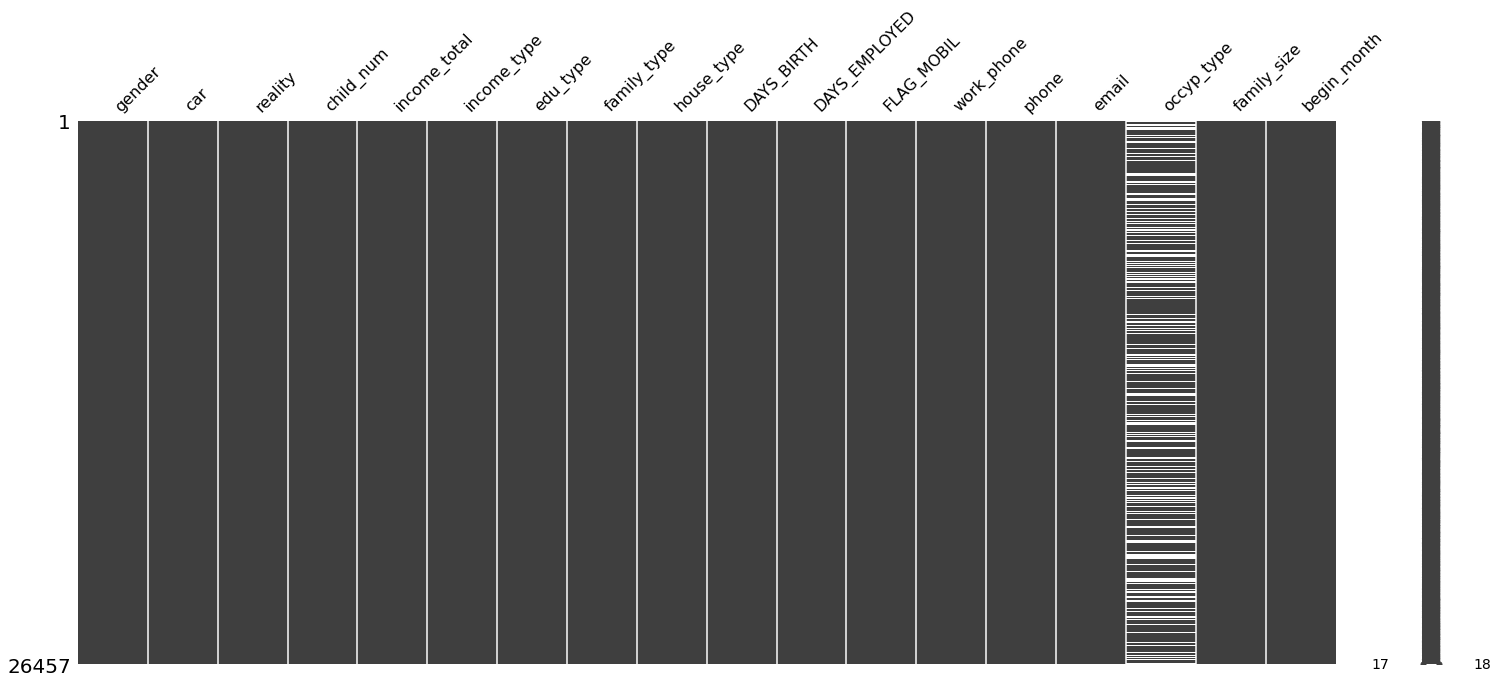

In [16]:
msno.matrix(data)

<AxesSubplot:>

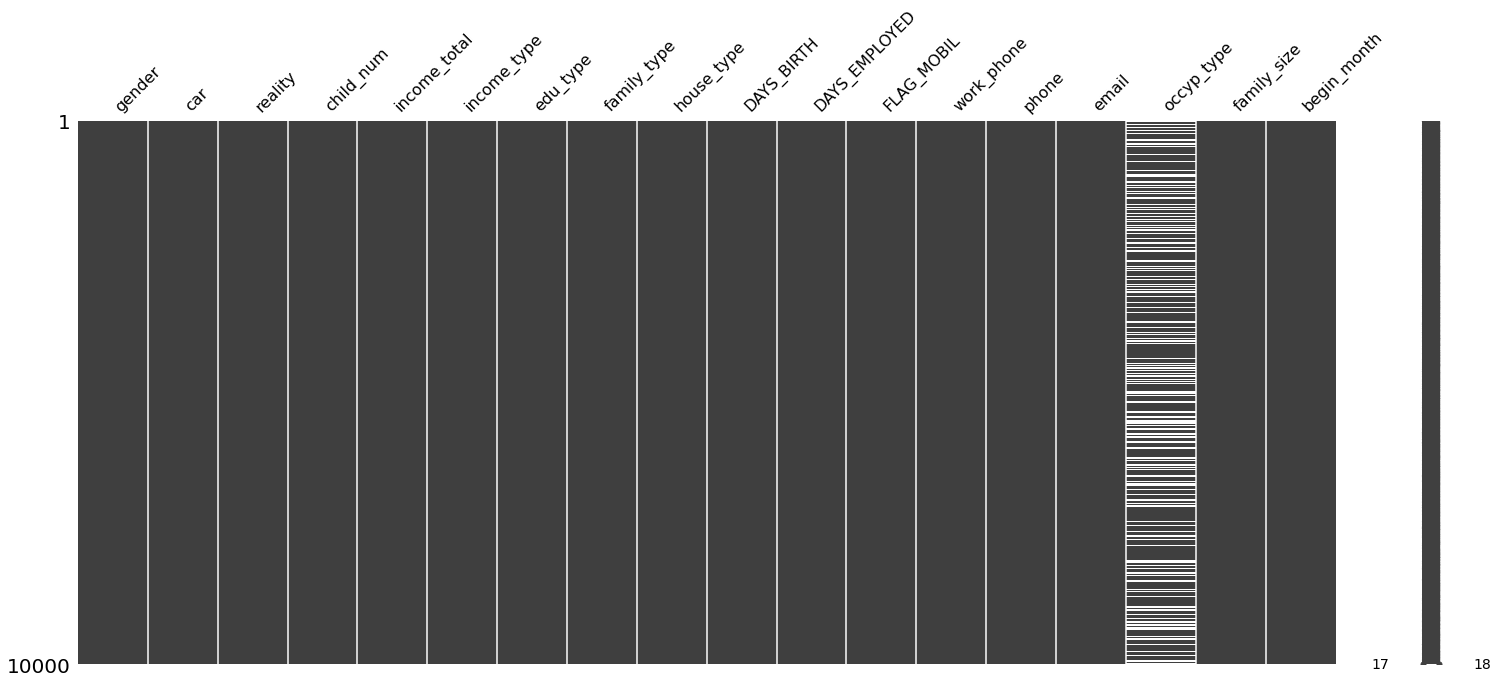

In [17]:
msno.matrix(x_test)

##### 수치형 변수들의 결측치 확인

In [18]:
pd.isna(data[num_columns]).sum()

child_num        0
income_total     0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
dtype: int64

In [19]:
pd.isna(x_test[num_columns]).sum()

child_num        0
income_total     0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
dtype: int64

##### 범주형 변수들의 결측치 확인

In [20]:
pd.isna(data[cat_columns]).sum()

gender            0
car               0
reality           0
income_type       0
edu_type          0
family_type       0
house_type        0
occyp_type     8171
dtype: int64

In [21]:
pd.isna(x_test[cat_columns]).sum()

gender            0
car               0
reality           0
income_type       0
edu_type          0
family_type       0
house_type        0
occyp_type     3152
dtype: int64

##### 데이터 쪼개기, Train -> (Train, Valid)
- train_test_split 파라미터 
    - test_size  (float): Valid(test)의 크기의 비율을 지정
    - random_state (int): 데이터를 쪼갤 때 내부적으로 사용되는 난수 값 (해당 값을 지정하지 않으면 매번 달라집니다.)
    - shuffle     (bool): 데이터를 쪼갤 때 섞을지 유무
    - stratify   (array): Stratify란, 쪼개기 이전의 클래스 비율을 쪼개고 나서도 유지하기 위해 설정해야하는 값입니다. 클래스 라벨을 넣어주면 됩니다.
        - ex) 원본 Train 데이터의 클래스 비율이 (7:3) 이었다면, 쪼개어진 Train, Valid(test) 데이터의 클래스 비율도 (7:3)이 됩니다. 당연히 분류 데이터에서만 사용할 수 있습니다.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# 쪼개어진 Train, Valid 데이터의 비율은 (7:3), 내부 난수 값 42, 데이터를 쪼갤 때 섞으며 label 값으로 Stratify 하는 코드 입니다. random_state를 주석 처리하고 데이터를 확인해보시면 계속 바뀝니다.
x_train, x_valid, y_train, y_valid = train_test_split(data, label, 
                                                      test_size=0.3,
                                                      random_state=42,
                                                      shuffle=True,
                                                      stratify=label)

In [24]:
# 쪼갠 데이터의 인덱스는 정리해주는것이 좋습니다. pd.concat 연산 시, 인덱스를 기준으로 연결하기 때문입니다.
# drop 인자를 True로 주지 않으면 이전 인덱스가 새로운 변수로 생성됩니다.
x_train = x_train.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)

### 1) 전처리 실습 

#### 1. 결측치 처리
`occyp_type` 변수 최빈 값으로 결측치 처리

In [123]:
# x_train[:] = imputer.transform(x_train)

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train[cat_columns])

x_train[cat_columns] = imputer.transform(x_train[cat_columns])
x_valid[cat_columns] = imputer.transform(x_valid[cat_columns])
x_test[cat_columns]  = imputer.transform(x_test[cat_columns])

#### 2. 스케일링

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train[num_columns])

x_train[num_columns] = scaler.transform(x_train[num_columns])
x_valid[num_columns] = scaler.transform(x_valid[num_columns])
x_test[num_columns]  = scaler.transform(x_test[num_columns])

#### 3. 범주형 변수 OneHot Encoding, 라벨 변수 Label Encoding 
- 범주형 변수 OneHot Encoding 처리

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(x_train[cat_columns])

ohe_columns = list()
for c in ohe.categories_:
    ohe_columns+=c.tolist()

new_x_train_cat = pd.DataFrame(ohe.transform(x_train[cat_columns]), columns=ohe_columns)
new_x_valid_cat = pd.DataFrame(ohe.transform(x_valid[cat_columns]), columns=ohe_columns)
new_x_test_cat  = pd.DataFrame(ohe.transform(x_test[cat_columns]), columns=ohe_columns)

x_train = pd.concat([x_train[num_columns], new_x_train_cat], axis=1)
x_valid = pd.concat([x_valid[num_columns], new_x_valid_cat], axis=1)
x_test  = pd.concat([x_test[num_columns], new_x_test_cat], axis=1)

In [39]:
x_train.shape

(18519, 55)

In [35]:
x_train.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,-0.565335,-0.296308,1.378369,-0.435687,0.0,-0.536582,-0.652071,-0.318028,-1.286842,-0.827445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.565335,-0.821308,-1.327989,-0.462389,0.0,-0.536582,-0.652071,-0.318028,-0.206511,1.100602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.565335,-0.296308,0.463571,-0.462578,0.0,1.863649,-0.652071,-0.318028,-0.206511,-0.164679,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.565335,-0.077558,0.717946,-0.433750,0.0,1.863649,1.533576,-0.318028,-0.206511,-1.429959,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.760078,-1.171308,-0.144552,-0.482011,0.0,-0.536582,-0.652071,-0.318028,0.873821,-0.224930,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
y_train, y_valid = y_train.astype(int), y_valid.astype(int)

In [38]:
y_train

14250    2
17670    0
12416    2
919      1
2401     2
        ..
2964     2
18430    0
3508     2
19936    0
7253     2
Name: credit, Length: 18519, dtype: int64

## Classification
머신러닝과 통계학에서의 분류는 새로 관측된 데이터가 어떤 범주 집합에 속하는지를 식별하는 것을 말합니다. <br>
훈련 데이터를 이용해 모델을 학습하면, 모델은 결정 경계(Decision boundary)라는 데이터를 분류하는 선을 만들어 냅니다.<br>
이번 수업에서는 여러가지 대표적인 모델의 원리를 간단히 알아보고, 결정 경계를 만들어 데이터를 분류해보겠습니다.<br>

<img src='./img/Classification.png' height=600 width=600 align='left'/>


### Logistic Regression
Regression 이라는 말에서 알 수 있듯이, 로지스틱 회귀 모델은 선형 회귀 모델에서 변형된 모델입니다. <br>
Odds라는 어떤 일이 발생할 상대적인 비율 개념을 사용해 선형 회귀식을 변형합니다.

$$ Odds = {p \over {1-p}} $$
$$ p : 어떤\ 일이\ 발생할\ 확률 $$

Odds를 그대로 사용하지말고 log를 취해 사용하면 0을 기준으로 상호 대칭적이며, 계산을 수월하게 할 수 있도록 변경해줍니다.<br>
기존의 선형 회귀식에서 y 위치에 log Odds를 적용하면 다음과 같은 식이 됩니다.<br>

$$ ln({Y \over {1-Y}}) = wx + b $$

<img src='./img/logodd.png' height=600 width=600/>

이를 y에 대해 정리하면 그 유명한 sigmoid 식이 됩니다.

$$ y = {1 \over {1+\exp^{-(wx + b)}}} $$


Logistic Regression은 Maximum Likelihood Estimation(MLE)이라는 과정을 통해 모델을 학습하는데, 자세한 내용은 참조 목록에 있는 페이지를 확인해주시면 감사하겠습니다.<br>

### 로지스틱 회귀은 이진 분류 모델로 알고 있는데, 어떻게 여러개의 클래스를 분류할 수 있나요?
하나의 수식이 출력하는 결과는 클래스의 확률을 나타내는 것은 맞습니다. 하지만, 멀티 클래스인 경우 내부적으로 클래스 수에 맞게 여러개의 수식을 만들어 각각의 클래스에 속할 확률을 계산한 후 가장 높은 확률은 가진 클래스로 분류합니다. 이를 One-vs-Rest라고 합니다. 자세한 내용은 참조 목록에 있는 페이지를 확인해주시면 감사하겠습니다.

Logistic Regression은 Sklearn의 linear_model 패키지에 있습니다.

- Logistic Regression 대표적 파라미터
    - C             (float): 얼마나 모델에 규제를 넣을지 결정하는 값 작아질수록 모델에 규제가 높아짐 (과적합 방지, from SVM) 
    - fit_intercept (bool) : 회귀 수식에서 y 절편을 포함할지 유무
    - random_state  (int)  : 내부적으로 사용되는 난수값
    - l1_ratio      (float): 규제 항을 얼마나 많이 적용할지 
    - class_weight  (dict) : 학습 시 클래스의 비율에 맞춰 손실값에 가중치를 부여
    
    
#### ref
- [Classification, Wiki](https://en.wikipedia.org/wiki/Statistical_classification)
- [로지스틱 회귀 파라미터 추정](https://ratsgo.github.io/machine%20learning/2017/07/02/logistic/)
- [Scikit-learn, Logistic Regression](https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html&sa=U&ved=0ahUKEwibhIa0-uDhAhVPeXAKHfPhCYQQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw2AirAop04TUH9X2S1r9FVd)

#### 1) 모델 불러오기 및 정의하기

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#### 2) 모델 학습하기 (훈련 데이터)

In [59]:
lr.fit(x_train, y_train)

/Users/kyle/opt/miniconda3/envs/kyle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 3) 결과 예측하기 (검증 데이터)

In [60]:
y_pred = lr.predict(x_valid)
y_pred_proba = lr.predict_proba(x_valid)

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다. + Log loss<br>

In [61]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score

In [62]:
y_valid.shape

(7938,)

In [63]:
y_valid[:10]

19218    2
16884    0
8298     2
14399    2
25691    1
22606    2
6330     2
25879    2
4197     2
1036     1
Name: credit, dtype: int64

In [64]:
y_pred_proba.shape

(7938, 3)

In [65]:
y_pred_proba[:10]

array([[0.13042632, 0.3079114 , 0.56166228],
       [0.13408634, 0.34627386, 0.5196398 ],
       [0.12352976, 0.21846431, 0.65800593],
       [0.11038891, 0.16308932, 0.72652178],
       [0.1311515 , 0.32840873, 0.54043977],
       [0.13656589, 0.11751826, 0.74591585],
       [0.11442452, 0.20633863, 0.67923686],
       [0.11980563, 0.31428714, 0.56590723],
       [0.10100073, 0.33312081, 0.56587846],
       [0.13509773, 0.40357652, 0.46132576]])

In [66]:
y_pred_proba[:10]

array([[0.13042632, 0.3079114 , 0.56166228],
       [0.13408634, 0.34627386, 0.5196398 ],
       [0.12352976, 0.21846431, 0.65800593],
       [0.11038891, 0.16308932, 0.72652178],
       [0.1311515 , 0.32840873, 0.54043977],
       [0.13656589, 0.11751826, 0.74591585],
       [0.11442452, 0.20633863, 0.67923686],
       [0.11980563, 0.31428714, 0.56590723],
       [0.10100073, 0.33312081, 0.56587846],
       [0.13509773, 0.40357652, 0.46132576]])

In [67]:
print('로지스틱 회귀, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('로지스틱 회귀, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

로지스틱 회귀, 정확도 : 0.6432
로지스틱 회귀, Log loss : 0.8632


#### 로지스틱 회귀 모델의 계수 w, 절편 b 살펴보기
어떤 변수에 얼마 만큼의 가중치가 할당되고, 절편 값은 얼마나 할당되는지 살펴볼 수 있습니다.

In [68]:
print('로지스틱 회귀, 계수(w) : {}, 절편(b) : {}'.format(lr.coef_, lr.intercept_))

로지스틱 회귀, 계수(w) : [[-4.38315534e-02  2.02589588e-02  1.83517221e-02  1.07637627e-01
   0.00000000e+00  3.21485221e-03  2.93380677e-02 -2.93369103e-02
   1.93243064e-02  1.83077928e-02 -1.15219644e-01 -1.23307007e-01
  -1.25377104e-01 -1.13149547e-01 -1.12287898e-01 -1.26238754e-01
   3.94625362e-02 -2.33670079e-01  5.41374365e-02 -9.45353293e-02
  -3.92121575e-03 -4.84617555e-01  9.98201086e-02 -3.55484140e-02
   9.68516719e-02  8.49675375e-02  1.51739277e-03 -4.05842290e-02
  -5.11687898e-02 -7.39444922e-02 -7.43465332e-02 -3.72765701e-02
  -5.62301337e-02  1.39594742e-02  5.68973779e-02 -1.23568388e-01
  -9.23084117e-02 -9.83004093e-03 -2.07119797e-01 -3.33722578e-02
  -1.75720915e-02 -7.80524045e-02  3.22877263e-01 -7.68968069e-02
   4.12042139e-01 -4.45342273e-02  4.07573105e-01 -3.30520948e-03
  -2.16113578e-01  2.17810758e-01  1.05604932e-01 -9.04420128e-02
  -1.89558827e-01 -1.32735496e-01 -6.04902098e-01]
 [ 4.84264842e-02 -4.87656345e-02  2.33738521e-02  1.82379438e-01
   0.000

### Support Vector Machine
Support Vector Machine(SVM, 서포트 벡터 머신)는 주어진 데이터를 바탕으로하여 두 카테고리(이진 분류의 경우) 사이의 간격(Margin, 마진)을 최대화하는 데이터 포인트(Support Vector, 서포트 벡터)를 찾아내고, <br>
그 서포트 벡터에 수직인 경계를 통해 데이터를 분류하는 알고리즘입니다.<br><br>
<img src="./img/SVM.png" alt="Support Vector machine" style="height: 400px" align='center'/>

### 왜 마진을 최대화 할까요?
서포트 벡터 머신에서 나오는 마진은 물건을 판매할때 마진이 20%다 라고 말하는 그 마진이 맞습니다. <br>
그렇다면 경계면과의 마진을 최대화 하는 것이 왜 분류를 잘하게 할까요? 

#### 경험적 위험 최소화(Empirical Risk Minimization, ERM) vs 구조적 위험 최소화(Structural Risk Minimization,SRM)
* 경험적 위험 최소화 
    * 훈련 데이터에 대해 위험을 최소화
    * 학습 알고리즘의 목표
    * 뉴럴 네트워크, 결정 트리, 선형 회귀, 로지스틱 회귀 등.
* 구조적 위험 최소화
    * 관찰하지 않은(Unseen) 데이터에 대해서도 위험을 최소화
    * 오차 최소화를 일반화 시키는 것
    
<div align='center'> 
    <font size="6">어떤 모델이 더 좋을까요?</font> 
</div>


<img src="./img/ERM_SRM.png" alt="ERM_SRM" style="height: 300px" align='center'/>


### Cost : Soft or Hard
SVM에는 Soft Margin, Hard Margin 이라는 말이 있습니다. 단어 자체에서도 유추할 수 있으시겠지만, Soft Margin은 유연한 경계면을 만들어내고 Hard Margin은 분명하게 나누는 경계면을 만들어냅니다. 그렇다면 왜 Soft Margin이 필요한걸까요?

<img src = "./img/Softmargin.png" alt="Softmargin" style="height: 400px" />

다음과 같은 데이터 분포는 직선으로 두개의 데이터를 나누는 경계면을 만들기 어렵습니다. 현실에서도 우리가 최적의 답을 찾지 못할때 어느정도 비용(Cost, C)을 감수하면서 적절한 답을 찾는 것을 떠올려보세요.<br>
Soft Margin은 그런 원리입니다. 경계면을 조금씩 넘어가는 데이터들(비용, Cost)을 감수하면서 가장 차선의 경계면을 찾습니다.<br>
실제 알고리즘에서도 C(Cost)값을 통해 얼마나 비용을 감수할 것인지를 결정할 수 있습니다. 크면 클수록 Soft Margin을, 작으면 작을수록 Hard Margin을 만들어냅니다. <br>


### 저차원을 고차원으로 Kernel Trick
SVM은 기본적으로 선형 분류를 위한 경계면을 만들어냅니다. 그렇다면 어떻게 비선형 분류를 할 수 있을까요?<br>

<img src = "./img/Hyperplane.png" alt="hyper" style="height: 300px" />

저차원(2차원)에서는 선형 분리가 되지 않을 수 있지만, 고차원(3차원)에서는 선형 분리가 가능할 수 있습니다.<br>
이러한 원리를 바탕으로 선형 분리가 불가능한 저차원 데이터를 선형 분리가 가능한 어떤 고차원으로 보내 선형 분리를 할 수 있습니다.<br>
하지만, 저차원 데이터를 고차원으로 보내서 서포트 벡터를 구하고 저차원으로 내리는 과정에서 더 복잡해지고 연산량도 많아질것이 분명합니다. <br>
그래서 여기에서 Kernel Trick이라는 Mapping 함수를 사용합니다. Kernel Trick은 고차원 Mapping과 고차원에서의 내적 연산을 한번에 할 수 있는 방법입니다. <br>
이를 통해 여러가지 Kernel 함수를 통해 저차원에서 해결하지 못한 선형 분리를 고차원에서 해결할 수 있습니다.<br>

대표적인 Kernel 함수
- Linear (선형 함수)
- Poly   (다항식 함수)
- RBF    (방사기저 함수)
- Hyper-Tangent (쌍곡선 탄젠트 함수)

서포트 벡터 머신 분류기는 Sklearn의 svm 패키지에 있습니다.

- SVM 대표적 파라미터
    - C             (float): 얼마나 모델에 규제를 넣을지 결정하는 값 작아질수록 모델에 규제가 높아짐 (과적합 방지, from SVM, Hard Margin) 
    - degree        (int)  : Poly Kernel 사용 시, 차수를 결정하는 값
    - kernel        (str)  : Kernel trick에 사용할 커널 종류
    - random_state  (int)  : 내부적으로 사용되는 난수값
    - class_weight  (dict) : 학습 시 클래스의 비율에 맞춰 손실값에 가중치를 부여
    - gamma         (float): 모델이 생성하는 경계가 복잡해지는 정도 (값이 커질수록 데이터 포인터가 영향력을 행사하는 거리가 짧아져 경계가 복잡해진다.)
    
### ref
- [Scikit-learn SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

#### 1) 모델 불러오기 및 정의하기

In [69]:
from sklearn.svm import SVC
svc = SVC(probability=True, max_iter=100)

#### 2) 모델 학습하기 (훈련 데이터)

In [70]:
svc.fit(x_train, y_train)

/Users/kyle/opt/miniconda3/envs/kyle/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=100, probability=True)

#### 3) 결과 예측하기 (검증 데이터)

In [71]:
y_pred = svc.predict(x_valid)
y_pred_proba = svc.predict_proba(x_valid)

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다. + Log loss<br>

In [72]:
print('서포트 벡터 머신, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('서포트 벡터 머신, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

서포트 벡터 머신, 정확도 : 0.2230
서포트 벡터 머신, Log loss : 0.8820


### Decision Tree
이전의 회귀 수업에서 결정 트리에 대해 간단하게 살펴보았었습니다.<br>
결정 트리는 입력 변수를 특정한 기준으로 잘라(분기) 트리 형태의 구조로 분류를 하는 모델입니다.<br>

<img src='./img/DTDesc.png' style="height: 400px"  />
<br>

* 사람의 논리적 사고 방식을 모사하는 분류 방법론
* IF-THEN rule의 조합으로 class 분류
* 결과를 나무 모양으로 그릴 수 있음
* Greedy 한 알고리즘 (한번 분기하면 이후에 최적의 트리 형태가 발견되더라도 되돌리지 않음, 최적의 트리 생성을 보장하지 않음)
* 축에 직교하는 분기점

<img src='./img/DT_G.png' style="height: 400px"  />

#### 불순도(Impurity, Entropy)
결정 트리는 데이터의 불순도를 최소화 할 수 있는 방향으로 트리를 분기합니다. <br>
불순도란 정보 이론(Information Theory)에서 말하는 얻을 수 있는 정보량이 많은 정도를 뜻합니다. <br>
정보 이론의 정보량의 자세한 내용은 참조 목록에 링크로 남겨두겠습니다. 확인해보시면 좋겠습니다.

결정 트리 모델은 Sklearn의 tree 패키지에 있습니다.

#### 가지치기 (Pruning)
풀트리를 생성하게되면 모델이 과적합되는데, 이를 방지하기 위한 방법으로 가지치기를 진행합니다.<br>
트리의 크기를 제한하거나, 리프 노드의 데이터셋 개수를 제한하는 방식으로 가지치기를 합니다.

- Decision Tree 대표적 파라미터
    - crierion          (str): 정보량 계산 시 사용할 수식 (gini, entropy)
    - max_depth         (int): 생성할 결정 트리의 높이
    - min_samples_split (int): 분기를 수행하는 최소한의 데이터 수
    - max_leaf_nodes    (int): 리프 노드에서 가지고 있을 수 있는 최대 데이터 수
    - random_state      (int): 내부적으로 사용되는 난수값
    
#### ref
- [Information Theory, ratsgo님 블로그](https://ratsgo.github.io/statistics/2017/09/22/information/)
- [Scikit-learn, Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

#### 1) 모델 불러오기 및 정의하기

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#### 2) 모델 학습하기 (훈련 데이터)

In [74]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

#### 3) 결과 예측하기 (검증 데이터)

In [75]:
y_pred = dt.predict(x_valid)
y_pred_proba = dt.predict_proba(x_valid)

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다.<br>

In [76]:
from sklearn.metrics import accuracy_score, log_loss

print('결정 트리, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('결정 트리, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

결정 트리, 정확도 : 0.6197
결정 트리, Log loss : 12.7143


#### Feature Importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 생성하는데 중요한지에 대한 변수 중요도를 살펴볼 수 있습니다.

In [77]:
feature_importance = pd.DataFrame(dt.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
feature_importance,0.013311,0.091778,0.157047,0.113101,0.0,0.015271,0.009152,0.008121,0.015222,0.348483,...,0.01345,0.001492,0.005353,0.004118,0.002625,0.000805,0.007084,0.001522,0.002403,0.001582


### Random Forest
결정 트리가 나무였다면, 랜덤 포레스트는 숲 입니다. 랜덤 포레스트의 특징은 작은 트리들을 여러개 만들어 합치는 모델입니다.<br>
서로 다른 변수 셋으로 여러 트리를 생성합니다. 여러개의 모델을 합치는 앙상블 기법 중 대표적인 예시입니다.<br>
랜덤 포레스트 모델은 Sklearn의 ensemble 패키지에 있습니다.

- RandomForest 대표적 파라미터
    - n_estimators      (int)  : 내부에서 생성할 결정 트리의 개수 
    - crierion          (str)  : 정보량 계산 시 사용할 수식 (gini, entropy)
    - max_depth         (int)  : 생성할 트리의 높이
    - min_samples_split (int)  : 분기를 수행하는 최소한의 데이터 수
    - max_leaf_nodes    (int)  : 리프 노드에서 가지고 있을 수 있는 최대 데이터 수
    - random_state      (int)  : 내부적으로 사용되는 난수값
    - n_jobs            (int)  : 병렬처리에 사용할 CPU 수
    - class_weight      (dict) : 학습 시 클래스의 비율에 맞춰 손실값에 가중치를 부여
    
#### ref
- [Scikit-learn, Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [78]:
import multiprocessing

In [79]:
multiprocessing.cpu_count()

16

#### 1) 모델 불러오기 및 정의하기

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=15)

#### 2) 모델 학습하기 (훈련 데이터)

In [88]:
%%time
rf.fit(x_train, y_train)

CPU times: user 3.26 s, sys: 136 ms, total: 3.39 s
Wall time: 380 ms


RandomForestClassifier(n_jobs=15)

#### 3) 결과 예측하기 (검증 데이터)

In [89]:
y_pred = rf.predict(x_valid)
y_pred_proba = rf.predict_proba(x_valid)

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다. + Log loss<br>

In [90]:
print('랜덤 포레스트, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('랜덤 포레스트, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

랜덤 포레스트, 정확도 : 0.7023
랜덤 포레스트, Log loss : 1.0063


#### Feature Importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 생성하는데 중요한지에 대한 변수 중요도를 살펴볼 수 있습니다.

In [91]:
feature_importance = pd.DataFrame(rf.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
feature_importance,0.017813,0.099838,0.131922,0.091853,0.0,0.014246,0.018976,0.009725,0.020927,0.355003,...,0.013223,0.001138,0.007434,0.003772,0.002214,0.000573,0.008029,0.00113,0.00249,0.001495


### 같이 해보는 실습 (10분)
#### 위에서 사용한 것과 같이 XGBoost, LightGBM 모델을 사용해보세요.

### XGBoost
Random Forest는 전체 데이터 샘플과 변수를 사용하는 것이 아닌, 임의로 데이터 샘플 및 변수를 선택하여 학습하는 부트스트래핑(Bootstrapping) 방식의 앙상블 알고리즘 입니다.<br>
XGBoost는 이름에서도 알 수 있듯 각 이터레이션에서 맞추지 못한 샘플에 대해 가중치를 부여하여 모델을 학습시키는 부스팅(Boosting) 계열의 트리 모델입니다.<br>
부스팅 알고리즘 자체도 강력하지만, XGBoost는 강력한 병렬 처리 성능과 자동 가지치기(Pruning) 알고리즘이 적용되어 기존 부스팅 알고리즘보다 과적합 방지에 이점이 있습니다.<br>
또한 자체 교차검증 알고리즘과 결측치 자체처리 기능을 가지고 있습니다. 
다른 부스팅 알고리즘과 동일하게 `균형 트리 분할 방식`으로 모델을 학습하여 대칭적인 트리를 형성하게됩니다.

1. Gradient Boosting Model 대비 빠른 수행시간
2. 과적합 규제 기능(Regularization)
3. 가지치기 기능(Tree pruning)
4. 자체 내장 교차 검증 기능
5. 결측치 자체 처리(결측치 처리를 하지 않아도 모델 사용 가능)
6. Early Stopping 기능

- XGBoost 대표적 파라미터
    - n_estimators      (int)  : 내부에서 생성할 결정 트리의 개수 
    - max_depth         (int)  : 생성할 결정 트리의 높이
    - learning_rate     (float): 훈련량, 학습 시 모델을 얼마나 업데이트할지 결정하는 값
    - colsample_bytree  (float): 열 샘플링에 사용하는 비율
    - subsample         (float): 행 샘플링에 사용하는 비율
    - reg_alpha         (float): L1 정규화 계수
    - reg_lambda        (float): L2 정규화 계수
    - booster           (str)  : 부스팅 방법 (gblinear / gbtree / dart)
    - random_state      (int)  : 내부적으로 사용되는 난수값
    - n_jobs            (int)  : 병렬처리에 사용할 CPU 수
    
#### ref
- [Gradient Boosting 3months님 블로그](https://3months.tistory.com/368)
- [XGBoost rosypark님 블로그](https://rosypark.tistory.com/59)

#### 1) 모델 불러오기 및 정의하기

In [94]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000,
                    n_jobs=15)

#### 2) 모델 학습하기 (훈련 데이터)

In [98]:
# N 이라는 컬럼이 2개 중복으로 존재함.
# x_train.columns # <- 컬럼 이름 앞에 prefix를 달아서 해결 가능
# x_train.values # <-귀찮으면 그냥 numpy array로 사용하세요.

In [100]:
xgb.fit(x_train.values, y_train.values,
        eval_set=[ [x_valid.values, y_valid.values] ],
        eval_metric='mlogloss',
        early_stopping_rounds=10,
        verbose=10)

[0]	validation_0-mlogloss:0.97812
[10]	validation_0-mlogloss:0.80009
[20]	validation_0-mlogloss:0.79003
[30]	validation_0-mlogloss:0.78262
[40]	validation_0-mlogloss:0.77462
[50]	validation_0-mlogloss:0.76718
[60]	validation_0-mlogloss:0.76250
[70]	validation_0-mlogloss:0.75917
[80]	validation_0-mlogloss:0.75710
[90]	validation_0-mlogloss:0.75317
[100]	validation_0-mlogloss:0.75269
[110]	validation_0-mlogloss:0.75087
[120]	validation_0-mlogloss:0.75133


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=15,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### 3) 결과 예측하기 (검증 데이터)

In [101]:
y_pred = xgb.predict(x_valid)
y_pred_proba = xgb.predict_proba(x_valid)

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다. + Log loss<br>

In [102]:
print('XGBoost, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('XGBoost, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

XGBoost, 정확도 : 0.7045
XGBoost, Log loss : 0.7509


#### Feature Importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 생성하는데 중요한지에 대한 변수 중요도를 살펴볼 수 있습니다.

In [104]:
xgb.feature_importances_

array([0.01837989, 0.01921039, 0.02200361, 0.02404991, 0.        ,
       0.02281144, 0.02074953, 0.0177352 , 0.02217017, 0.04406811,
       0.01842459, 0.        , 0.02106404, 0.        , 0.01703606,
       0.        , 0.01968961, 0.01922438, 0.02204987, 0.        ,
       0.02219453, 0.01749564, 0.01734812, 0.02302583, 0.01645326,
       0.02110086, 0.02242602, 0.02103811, 0.01979367, 0.01968192,
       0.0182161 , 0.02717637, 0.02319964, 0.01627446, 0.01688107,
       0.02296807, 0.01781123, 0.02228169, 0.01497321, 0.01602019,
       0.02041745, 0.02833881, 0.014506  , 0.01708931, 0.01131447,
       0.01741317, 0.01665284, 0.0210736 , 0.01788363, 0.01978409,
       0.01282729, 0.02303305, 0.01224547, 0.0146278 , 0.02776621],
      dtype=float32)

In [103]:
feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
feature_importance,0.01838,0.01921,0.022004,0.02405,0.0,0.022811,0.02075,0.017735,0.02217,0.044068,...,0.017413,0.016653,0.021074,0.017884,0.019784,0.012827,0.023033,0.012245,0.014628,0.027766


### LightGBM
XGBoost가 기존의 부스팅 트리 모델보다는 학습이 빠르다는 장점이 있지만, 여전히 속도가 느린 알고리즘입니다. <br>
LightGBM은 XGBoost보다 가볍고 더 나은 학습 성능을 제공하며, 더 적은 메모리를 사용합니다. <br>
다른 부스팅 트리와는 다른 특징으로 `균형 트리 분할 방식`으로 모델을 학습시키는 것이 아닌 `리프 중심 트리 분할`방식을 사용해 비대칭적인 트리를 형성하게 됩니다. <br>
예측 성능 자체는 XGBoost와 비슷하지만 학습 속도 및 메모리 사용량에서 이점을 갖습니다. 

1. XGBoost의 장점 + 
2. XGBoost 보다 가볍고 빠른 모델, 하지만 더 나은 학습 성능
3. Leaf-wise tree growth (대체적으로 더 나은 성능을 보장하지만, 적은 데이터에서 과적합 우려)

- LightGBM 대표적 파라미터
    - n_estimators      (int)  : 내부에서 생성할 결정 트리의 개수 
    - max_depth         (int)  : 생성할 결정 트리의 높이
    - learning_rate     (float): 훈련량, 학습 시 모델을 얼마나 업데이트할지 결정하는 값
    - colsample_bytree  (float): 열 샘플링에 사용하는 비율
    - subsample         (float): 행 샘플링에 사용하는 비율
    - reg_alpha         (float): L1 정규화 계수
    - reg_lambda        (float): L2 정규화 계수
    - boosting_type     (str)  : 부스팅 방법 (gbdt / rf / dart / goss)
    - random_state      (int)  : 내부적으로 사용되는 난수값
    - n_jobs            (int)  : 병렬처리에 사용할 CPU 수
    
#### ref
- [LightGBM greatjoy님 블로그](https://greatjoy.tistory.com/72)

#### 1) 모델 불러오기 및 정의하기

In [108]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=1000,
                    n_jobs=15)

#### 2) 모델 학습하기 (훈련 데이터)

In [110]:
lgb.fit(x_train.values, y_train.values,
        eval_set=[ [x_valid.values, y_valid.values] ],
        eval_metric='logloss',
        early_stopping_rounds=10,
        verbose=10)

/Users/kyle/opt/miniconda3/envs/kyle/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kyle/opt/miniconda3/envs/kyle/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's multi_logloss: 0.811043
[20]	valid_0's multi_logloss: 0.794842
[30]	valid_0's multi_logloss: 0.787183
[40]	valid_0's multi_logloss: 0.781112
[50]	valid_0's multi_logloss: 0.776333
[60]	valid_0's multi_logloss: 0.772383
[70]	valid_0's multi_logloss: 0.769029
[80]	valid_0's multi_logloss: 0.766469
[90]	valid_0's multi_logloss: 0.764283
[100]	valid_0's multi_logloss: 0.762855
[110]	valid_0's multi_logloss: 0.760743
[120]	valid_0's multi_logloss: 0.760068
[130]	valid_0's multi_logloss: 0.75865
[140]	valid_0's multi_logloss: 0.75809
[150]	valid_0's multi_logloss: 0.757656
[160]	valid_0's multi_logloss: 0.757235
[170]	valid_0's multi_logloss: 0.756613


LGBMClassifier(n_estimators=1000, n_jobs=15)

#### 3) 결과 예측하기 (테스트 데이터)

In [111]:
y_pred = lgb.predict(x_valid)
y_pred_proba = lgb.predict_proba(x_valid)

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다. + Log loss<br>

In [112]:
print('LightGBM, 정확도 : {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('LightGBM, Log loss : {:.4f}'.format(log_loss(y_valid, y_pred_proba)))

LightGBM, 정확도 : 0.7045
LightGBM, Log loss : 0.7564


#### Feature Importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 생성하는데 중요한지에 대한 변수 중요도를 살펴볼 수 있습니다.

In [113]:
feature_importance = pd.DataFrame(lgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
feature_importance,252,2290,3166,2677,0,216,303,121,312,2046,...,268,29,91,57,34,30,102,19,45,23


## Evaluation 
### 1. Accuracy, 정확도
모든 데이터에 대해 클래스 라벨을 얼마나 잘 맞췄는지를 계산 

<img src= './img/Accuracy.png' alter='Accuracy' style="height: 350px"/> 

### 2. Confusion Matrix, 혼동 행렬
정확도로는 분류 모델의 평가가 충분하지 않을 수 있습니다. 예를 들어, 병이 있는 사람을 병이 없다고 판단하는 경우 Risk가 높기 때문에 모델의 목적에 맞게 분류 모델을 평가하여야 합니다. 이때 사용되는 것이 Confusion Matrix 입니다. 

<img src= './img/Confusion_Matrix.png' alter='Confusion_Matrix' style="height: 200px"/> 

* Precision, 정밀도  : TP/(FP+TP), 1이라고 예측한 것 중 실제로 1인 것 
    - 모델이 1이라고 예측한 것 중에 실제로 1인 것
* Recall, 재현율 : True Positive rate = Recall = Hit ratio = TP/(TP+FN), 실제로 1인 것 중에 1이라고 예측한 것 
    - 실제로 1인 것 중에 모델이 1이라고 예측한 것, 질병 예측에서 가장 중요한 척도 중 하나, 예측을 잘못하면 사람이 죽을 수도 있기 때문에
* False Alarm, 오탐 : False Positive rate = 1-Specificity = FP/(FP+TN), 실제로 0인 것 중에 1이라고 예측한 것
    - 이게 코로나 검사에서 안걸렸는데 걸렸다고 하는 경우 입니다.
* F1 Score, 정밀도와 재현율의 조화 평균 : 클래스 불균형한 문제에서 주로 사용되는 평가지표

### 3. ROC Curve, AUC
ROC Curve(Receiver-Operating Characteristic curve)는 민감도와 특이도가 서로 어떤 관계를 가지며 변하는지를 2차원 평면상에 표현한 것 입니다.<br>
ROC Curve가 그려지는 곡선을 의미하고, AUC(Area Under Curve)는 ROC Curve의 면적을 뜻합니다.<br>
AUC 값이 1에 가까울 수록 좋은 모델을 의미합니다. 

<img src= './img/ROC_AUC.png' alter='ROC_AUC' style="height: 500px"/> 

#### 정확도, 정밀도, 민감도, AUC Score
- 클래스가 불균형한 데이터인 경우 정확도로 모델의 성능을 판단하는건 적절하지 않습니다. 
    - 이러한 경우에는 정밀도나 재현율 또는 정밀도와 재현율의 조화 평균인 F1 Score를 사용하기도 합니다.
    
#### ref
- [ROC AUC adnoctum님 블로그](https://adnoctum.tistory.com/121)

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [120]:
print('Accuracy : {:.3f}'.format(accuracy_score(y_valid, y_pred)))
print('Precision : {:.3f}'.format(precision_score(y_valid, y_pred, average='weighted')))
print('Recall : {:.3f}'.format(recall_score(y_valid, y_pred, average='weighted')))
print('F1 Score: {:.3f}'.format(f1_score(y_valid, y_pred, average='weighted')))
print('AUC : {:.3f}'.format(roc_auc_score(y_valid, y_pred_proba, multi_class='ovr')))

Accuracy : 0.704
Precision : 0.693
Recall : 0.704
F1 Score: 0.639
AUC : 0.708


--------------------

## 실습 솔루션

### 1) 전처리 실습 

#### 1. 결측치 처리
`occyp_type` 변수 최빈 값으로 결측치 처리

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
x_train[cat_columns] = imputer.fit_transform(x_train[cat_columns])
x_valid[cat_columns] = imputer.transform(x_valid[cat_columns])
x_test[cat_columns]  = imputer.transform(x_test[cat_columns])

#### 2. 스케일링

In [ ]:
x_train_mean = np.mean(x_train[num_columns], axis=0)
x_train_std  = np.std(x_train[num_columns], axis=0)

# Numpy 브로드캐스팅 기능을 활용해 x_train의 평균과 표준편차로 x_train, x_valid의 스케일링을 진행해줍니다.
x_train.loc[:, num_columns] = (x_train[num_columns] - x_train_mean) / (x_train_std + 1e-10)
x_valid.loc[:, num_columns] = (x_valid[num_columns] - x_train_mean) / (x_train_std + 1e-10)
x_test.loc[:, num_columns]  = (x_test[num_columns]  - x_train_mean) / (x_train_std + 1e-10)

#### 스케일링 확인

In [ ]:
x_train[num_columns].describe()

In [ ]:
x_valid[num_columns].describe()

In [ ]:
x_test[num_columns].describe()

#### 왜 x_valid와 x_test는 평균이 0, 표준편차가 1이 아닌가요? -> x_train의 평균과 표준편차를 사용했기 때문에 x_valid의 평균과 표준편차가 0, 1이 아닐 수 있습니다.

#### 3. 범주형 변수 OneHot Encoding, 라벨 변수 Label Encoding 
- 범주형 변수 OneHot Encoding 처리

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False)

ohe.fit(x_train[cat_columns])

In [ ]:
# new_x_train_cat = ohe.transform(x_train[cat_columns])
# new_x_valid_cat = ohe.transform(x_valid[cat_columns])
# new_x_test_cat = ohe.transform(x_test[cat_columns])

In [ ]:
# 둘다 가능
x_all = pd.concat([x_train[cat_columns], x_valid[cat_columns], x_test[cat_columns]], axis=0)

# 전체에 대해 fiting
ohe.fit(x_all)

# ohe.categories_ 은 입력된 범주형 컬럼의 범주 값을 순서대로 담고 있습니다.
ohe_columns = ohe.categories_[0].tolist()
for col in ohe.categories_[1:]:
    ohe_columns += col.tolist()
ohe_columns

In [ ]:
new_x_train_cat = pd.DataFrame(ohe.transform(x_train[cat_columns]), columns=ohe_columns)
new_x_valid_cat = pd.DataFrame(ohe.transform(x_valid[cat_columns]), columns=ohe_columns)
new_x_test_cat  = pd.DataFrame(ohe.transform(x_test[cat_columns]),  columns=ohe_columns)

In [ ]:
# train set 개수 확인
new_x_train_cat.shape, x_train.shape

In [ ]:
# valid set 개수 확인
new_x_valid_cat.shape, x_valid.shape

In [ ]:
# test set 개수 확인
new_x_test_cat.shape, x_test.shape

In [ ]:
# 동일하게 데이터를 쪼갤 시 인덱스를 초기화합니다.
new_x_train_cat.reset_index(drop=True, inplace=True)
new_x_valid_cat.reset_index(drop=True, inplace=True)
new_x_test_cat.reset_index(drop=True,  inplace=True)

##### 기존 범주형 변수를 제거하고, Onehot Encoding된 변수를 추가합니다.

In [ ]:
# Onehot Encoding 변수 추가
x_train = pd.concat([x_train[num_columns], new_x_train_cat], axis=1)
x_valid = pd.concat([x_valid[num_columns], new_x_valid_cat], axis=1)
x_test  = pd.concat([x_test[num_columns],  new_x_test_cat],  axis=1)

In [ ]:
# train 확인
x_train.head()

In [ ]:
# valid 확인
x_valid.head()

In [ ]:
# test 확인
x_test.head()

라벨 변수 인코딩 (범주형 변수인 경우)

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
le = LabelEncoder()
le.fit(y_train)

In [ ]:
# 인코딩 전
y_train[:10]

In [ ]:
y_train = le.transform(y_train)
y_valid = le.transform(y_valid)

In [ ]:
# 인코딩 후
y_train[:10]

    이미 수치형 데이터이므로
    다음과 같이 처리해도 무방합니다.
    y_train = y_train.astype(int)
    y_valid = y_valid.astype(int)